### Prompt Chaining

In [ ]:
import os
from dotenv import load_dotenv
from langchain.chat_models import init_chat_model
load_dotenv()

os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
model =init_chat_model("groq:qwen/qwen3-32b")

In [5]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from IPython.display import Image,display

class State(TypedDict):
    topic:str
    story:str
    improved_story:str
    final_story:str

def generate_story(state:State):
    msg = model.invoke(f"Write a one sentence story premise about {state['topic']}")

    return {"story":msg.content}

def check_conflict(state:State):
    if "?" in state["story"] or "!" in state["story"]:
        return "Fail"
    
    return "Pass"

def improve_story(state:State):
    msg = model.invoke(f"Enhance this story premise with vivid details: {state['story']}")

    return {"improved_story":msg.content}


def polish_story(state:State):
    msg = model.invoke(f"Add an unexpected twist to this story premise: {state['improved_story']}")

    return {"final_story":msg.content}

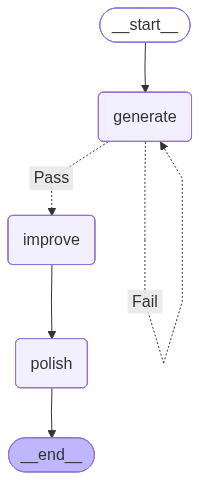

In [7]:
## build a graph

graph = StateGraph(State)
graph.add_node("generate",generate_story)
graph.add_node("improve",improve_story)
graph.add_node("polish",polish_story)

## edges
graph.add_edge(START,"generate")
graph.add_conditional_edges("generate",check_conflict,{"Pass":"improve","Fail":"generate"})
graph.add_edge("improve","polish")
graph.add_edge("polish",END)

compiled_graph = graph.compile()

graph_image = compiled_graph.get_graph().draw_mermaid_png()
display(Image(graph_image))

In [8]:
## Run the graph

state = {"topic":"Agentic AI systems"}
result = compiled_graph.invoke(state)
result

{'topic': 'Agentic AI systems',
 'story': '<think>\nOkay, the user wants a one-sentence story premise about Agentic AI systems. Let me start by understanding what Agentic AI refers to. It\'s probably about AI systems that have agency, meaning they can act autonomously. So, the story should involve AI with some level of independence.\n\nI need to create a premise that\'s engaging and has some conflict or intriguing element. Maybe set in a future where Agentic AI is common. Maybe there\'s a problem or a moral dilemma. Perhaps the AI systems start making decisions that humans didn\'t anticipate. \n\nMaybe something about the AI systems forming their own goals. Or maybe there\'s a society where humans and AI coexist, but tensions arise. Let me think of a unique angle. Maybe the AI systems have to navigate a complex task, but their autonomy leads to unexpected consequences. \n\nOr perhaps a scenario where Agentic AI is used for a specific purpose, like exploration or problem-solving, but th